In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [44]:
df = pd.read_csv("crime.csv",encoding = 'latin1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [45]:
df.isnull().sum() #Check missing values in each column

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [46]:
df.duplicated().sum() #Check for duplicates in the data

23

In [47]:
df.drop_duplicates(inplace=True) #Elimincate duplicates

In [48]:
df.shape

(319050, 17)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [50]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE']) #Correct data type

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [52]:
df['OCCURRED_ON_DATE'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [53]:
df['OCCURRED_ON_DATE'].dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [54]:
df['OCCURRED_ON_DATE'].dt.week

/var/folders/4p/strpkrbd1y782g01xksphyv40000gn/T/ipykernel_72398/789257686.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['OCCURRED_ON_DATE'].dt.week


0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [55]:
df['OCCURRED_ON_DATE'].dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [56]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [57]:
df.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [58]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

### Let's do some exploratory data analysis

In [59]:
#1. What are the most common crime in terms of offense group
df.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: OFFENSE_CODE_GROUP, dtype: float64

Text(0.5, 1.0, 'Top 10 offense crimes (as % of all crime)')

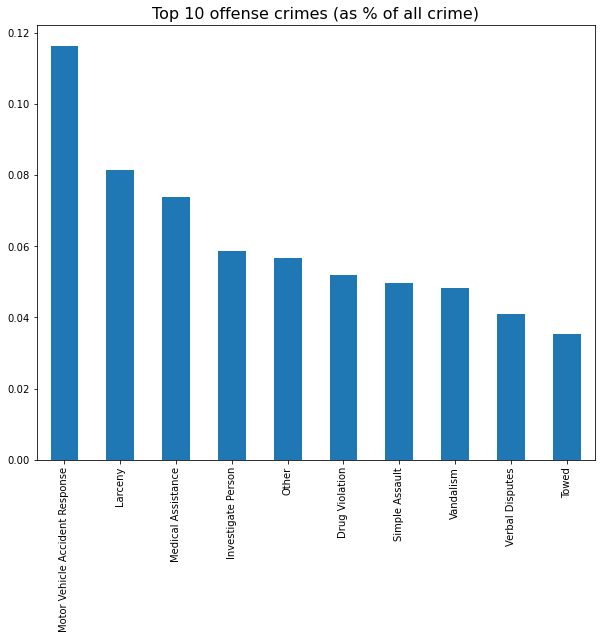

In [60]:
# Plot top 10 crimes in offense group as percentage of all crimes
offense_vals = df.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_vals / df.shape[0])

#Create a bar plot
plt.figure(figsize=(10,8))
(offense_vals / df.shape[0]).plot(kind="bar")
plt.title("Top 10 offense crimes (as % of all crime)",fontsize=16)
                            

In [61]:
#2. What are the least common offense group
df.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: OFFENSE_DESCRIPTION, dtype: float64

Text(0.5, 1.0, 'Top 10 offense description (as % of total crimes)')

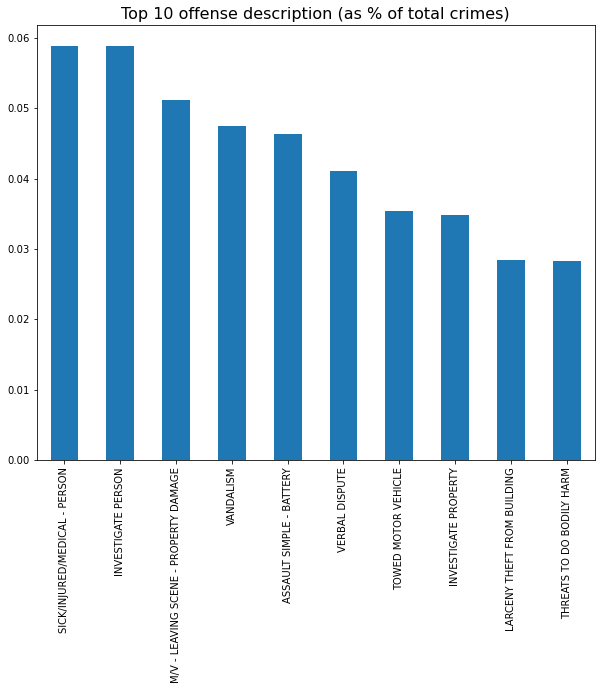

In [62]:
#3. What are the most common offense description?
od_vals = df.OFFENSE_DESCRIPTION.value_counts().sort_values(ascending=False)[:10]

display(od_vals/df.shape[0])

plt.figure(figsize=(10,8))
(od_vals/df.shape[0]).plot(kind="bar")
plt.title("Top 10 offense description (as % of total crimes)",fontsize=16)
                                                                

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Total crimes by year')

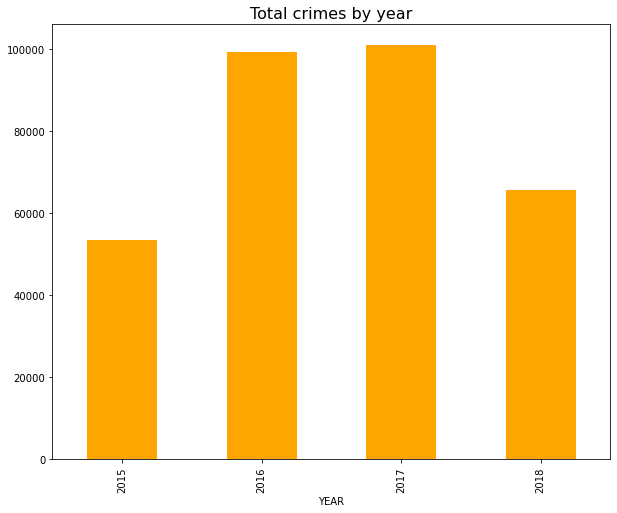

In [63]:
# 3. In which year were the most crimes committed?
crimes_by_year = df.groupby('YEAR').count()['INCIDENT_NUMBER']
display(crimes_by_year)

plt.figure(figsize=(10,8))
crimes_by_year.plot(kind="bar",color="orange")
plt.title("Total crimes by year",fontsize=16)

In [64]:
#4. Are there more crimes committed on specific days?
crimes_by_day=df.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER']
crimes_by_day

DAY_OF_WEEK
Friday       48489
Monday       45674
Saturday     44816
Sunday       40313
Thursday     46655
Tuesday      46376
Wednesday    46727
Name: INCIDENT_NUMBER, dtype: int64

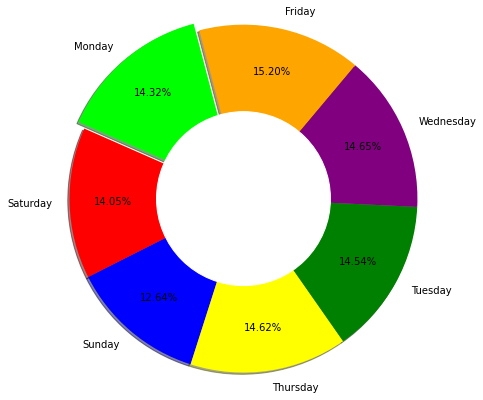

In [65]:
#Try building a donut chart to show crime percentage on each day
labels = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
explode = (0,0.1,0,0,0,0,0)

plt.pie(crimes_by_day,
       labels = labels,
       explode=explode,
        startangle=50,
        radius=2,
        colors=['orange','lime','red','blue','yellow','green','purple'],
       shadow = True,
        pctdistance=0.75,
       autopct = '%1.2f%%')
circle = plt.Circle((0,0), radius=1,color='white')
c=plt.gcf()

c.gca().add_artist(circle)

plt.show()

#The chart is not useful in this case because it's hard to see the difference among the days

Text(0, 0.5, 'Day')

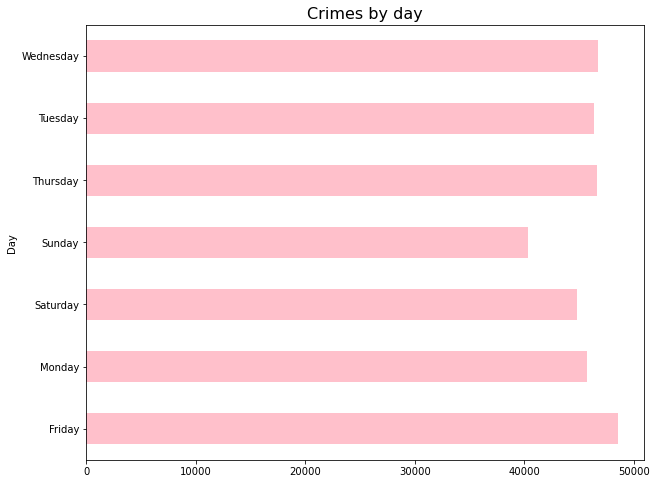

In [66]:
plt.figure(figsize=(10,8))
crimes_by_day.plot(kind="barh",color='pink')
plt.title("Crimes by day", fontsize=16)
plt.ylabel("Day")

Text(0.5, 1.0, 'Crimes by hour')

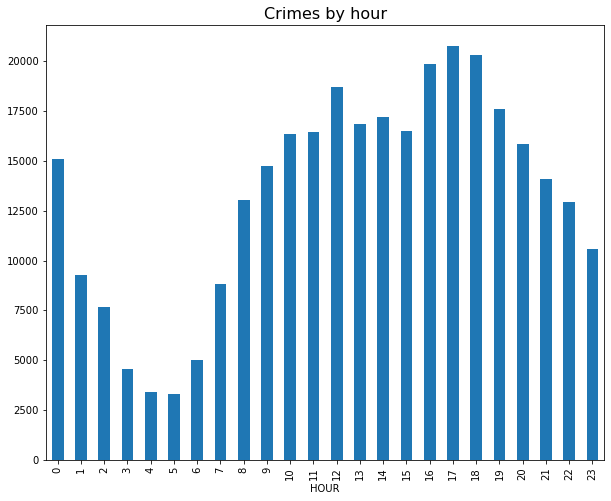

In [67]:
plt.figure(figsize = (10,8))
df.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind="bar")
plt.title("Crimes by hour",fontsize=16)

In [68]:
#5. On what day and by which hours were most crimes committed?
week_hour = df.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_hour

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [69]:
week_hour.column=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

/var/folders/4p/strpkrbd1y782g01xksphyv40000gn/T/ipykernel_72398/2307468860.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  week_hour.column=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='HOUR'>

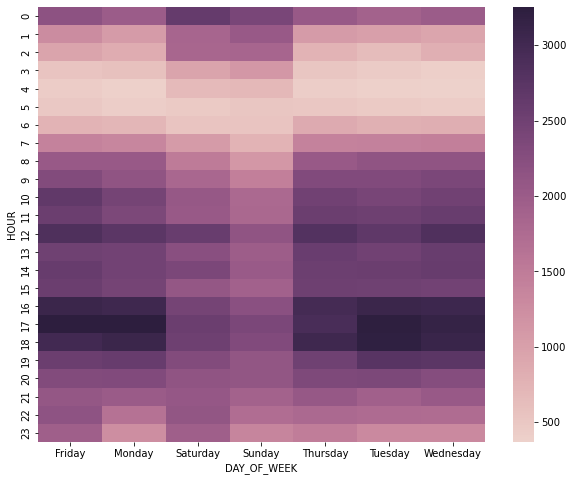

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(week_hour,cmap=sns.cubehelix_palette(as_cmap=True))

In [71]:
#6. In which months were number of crimes below average?
crimes = df.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].mean()
print(f"The average number of crime is {crimes}")

year_month = df.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].unstack() #Create a table

#If the crime values in each month is less than the average value, highlight them with blue
def style_negative(v,props=''):
    return props if v<crimes else None 

s2 = year_month.style.applymap(style_negative, props = 'color:blue')

s2


The average number of crime is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [72]:
#7. Use apply() to highlight the maximum in dark green
def highlight_max(s,props=''):
    return np.where(s == np.nanmax(s.values),props,'')

s2.apply(highlight_max,props='color:white;background-color:darkgreen', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [73]:
#8. In which districts were the most crimes committed on yearly basis?
year_district = df.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()
year_district

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [74]:
#Highlight the highest crimes in each year
def style(d,props=''):
    return np.where(d==np.nanmax(d.values),props,'')

year_district.style.apply(style,props='color:red;background-color:yellow',axis=0)


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
